Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your name:

-   **Name**: Daniel Kienast

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

The data shows how users’ mobility patterns - what types of places they
spend time in - varied over the course of the COVID-19 pandemic.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

When you are finished, make sure you have run all of the cells in the
notebook (in order), and then create a PDF from it. Submit the PDF on
Gradescope.

**Important note**: You won’t necessarily have learned or seen in
advance how to use all the Python commands and library functions you
need to complete this assignment. That’s OK. Part of the learning
objective here is to practice finding and applying that kind of new
information as you go! Use the library documentation, search the
Internet, or ask questions on Ed if you need any help.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [15]:
# TODO Q1
url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df = pd.read_csv(url)

<ipython-input-15-d83a71b3868c>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [16]:
# TODO Q2
print("-------------df.info()-------------")
df.info()

-------------df.info()-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11 

In [17]:
# TODO Q3
print("-------------df.head()-------------")
print(df.head())

-------------df.head()-------------
  country_region_code        country_region sub_region_1 sub_region_2  \
0                  AE  United Arab Emirates          NaN          NaN   
1                  AE  United Arab Emirates          NaN          NaN   
2                  AE  United Arab Emirates          NaN          NaN   
3                  AE  United Arab Emirates          NaN          NaN   
4                  AE  United Arab Emirates          NaN          NaN   

  metro_area iso_3166_2_code  census_fips_code                     place_id  \
0        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
1        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
2        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
3        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   
4        NaN             NaN               NaN  ChIJvRKrsd9IXj4RpwoIwFYv0zM   

         date  retail_and_recreation_percent_chang

Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [18]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])


Next, you are going to extract the subset of data for the U.S. state of
your choice. You can choose any location *except* New York.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single U.S. state (but *not* New York).

In [19]:
# TODO Q5
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("Florida")) & (df['sub_region_2'].isnull())]
df = None
print("-------------df_subset.info()-------------")
df_subset.info()
print(df_subset.describe())
print(df_subset['sub_region_1'].unique())
print(df_subset['sub_region_2'].unique())
print("-------------df_subset.head()-------------")
pd.set_option('display.max_columns', None)
print(df_subset.head())

-------------df_subset.info()-------------
<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 9365125 to 9366098
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 974 non-null    object        
 1   country_region                                      974 non-null    object        
 2   sub_region_1                                        974 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   metro_area                                          0 non-null      object        
 5   iso_3166_2_code                                     974 non-null    object        
 6   census_fips_code                                    0 non-null      float64       
 7   place_id                                          

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

Also check whether there are any missing rows of data. What date range
is represented in this data? Is every day within that range included in
the data?

In [20]:
# TODO Q6
print("-------------empty values in percent_change_from_baseline-------------")
for col in df_subset[df_subset.columns[df_subset.columns.str.endswith('percent_change_from_baseline')]]:
    print(col)
    print(df_subset[col].unique())
    print(df_subset[col].isnull().sum())
print("-------------Missing rows-------------")
min_dt = df_subset.date.min()
max_dt = df_subset.date.max()
print(min_dt)
print(max_dt)
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='d' )
missing_days = expected_range.difference(df_subset['date'])
print(missing_days)
hour_counts = df_subset['date'].value_counts()
print(hour_counts.loc[hour_counts > 1])

-------------empty values in percent_change_from_baseline-------------
retail_and_recreation_percent_change_from_baseline
[  2.   4.   5.   3.   0.   8.   6.   7.   1.  -6.  -9. -11. -19. -23.
 -29. -39. -43. -37. -38. -40. -44. -49. -50. -42. -47. -53. -57. -46.
 -66. -48. -41. -45. -36. -32. -31. -33. -35. -30. -26. -25. -28. -34.
 -27. -24. -21. -22. -20. -18. -16. -17. -15.  -4. -68.  -8.  -5. -13.
 -76. -12.  -7. -14. -10.  -2.  -3. -63.  10. -71.  -1. -52.]
0
grocery_and_pharmacy_percent_change_from_baseline
[  0.   1.   2.  -1.   6.   4.   7.  10.   5.   3.  17.  22.  16.   9.
  14.  -3. -12. -13. -14. -17. -23. -26. -22. -20. -11. -19. -25. -33.
 -21. -49. -24. -18. -15. -10.  -9. -16.  -8.  -7.  -4.  -6.  15. -39.
  23. -56.  -2.  13.  -5.  28. -34.   8.  25. -52.  11. -28.  12. -40.
 -42.]
0
parks_percent_change_from_baseline
[  9.   8.  24.  13.  15.  10. -12.  20.  12.   6.  -9.   2.   4.  14.
  -1.  11.  17.   0.   1.  -7. -15. -33. -34. -38. -48. -42. -46. -41.
 -49. -57.

**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? (Even if, for
the U.S. state you have chosen, the data is complete, explain why some
data may be missing for other regions.)

**Include a short quote from the material you read in the “Learn about
the data” section to answer this question. Indicate that it is a quote
using quotation marks or a block quote, and cite the source, including a
URL.**

In my region there is no data missing. There may be missing data in regions because error in the system, privicy issues and quality issues.


>What data is included in the calculation depends on user settings, connectivity, and whether it meets our privacy threshold. When the data doesn't meet quality and privacy thresholds, you might see empty fields for certain places and dates. <br> https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data



To track trends in cases and vaccinations alongside mobility trends, we
can also read in data from several other sources. For example,

-   Our World in Data distributes data about COVID-19 vaccination status
    over time for U.S. states in their [Github
    repository](https://github.com/owid/covid-19-data).
-   The New York Times distributes data about COVID-19 cumulative cases
    over time for U.S. states in their [Github
    repository](https://github.com/nytimes/covid-19-data).

You can choose whether to look at vaccination trends or case trends for
the U.S. state you have selected. Use one of the following cells to read
in the data, convert the `date` field to a `datetime`, and get the
subset of the data that applies to the specific U.S. state for which you
are exploring mobility data.

Then, use `pandas` functions to check your new data frame and look at
the first few rows of data.

In [ ]:
# TODO Q8 - Vaccinations option

url_vax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
# df_vax = ...
# df_vax['date'] = ...
# df_vax_subset = ...
# check the data frame and look at a few rows

In [21]:
# TODO Q8 - Cases option

url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df = pd.read_csv(url_cases)
df_cases_subset = df[df['state'].eq("Florida")]
df = None
df_cases_subset['date'] = pd.to_datetime(df_cases_subset['date'])
print("-------------df_cases_subset.head()-------------")
print(df_cases_subset.head())
# check the data frame and look at a few rows
df_cases_subset.info()
print(df_cases_subset.describe())
for col in df_cases_subset:
    print(col)
    print(df_cases_subset[col].unique())
    print(df_cases_subset[col].isnull().sum())
print("-------------Missing rows-------------")
min_dt = df_cases_subset.date.min()
max_dt = df_cases_subset.date.max()
print(min_dt)
print(max_dt)
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='d' )
missing_days = expected_range.difference(df_cases_subset['date'])
print(missing_days)
hour_counts = df_cases_subset['date'].value_counts()
print(hour_counts.loc[hour_counts > 1])

-------------df_cases_subset.head()-------------
          date    state  fips  cases  deaths
242 2020-03-01  Florida    12      2       0
255 2020-03-02  Florida    12      2       0
270 2020-03-03  Florida    12      3       0
286 2020-03-04  Florida    12      3       0
304 2020-03-05  Florida    12      4       0
<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 242 to 61896
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1118 non-null   datetime64[ns]
 1   state   1118 non-null   object        
 2   fips    1118 non-null   int64         
 3   cases   1118 non-null   int64         
 4   deaths  1118 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 52.4+ KB
                      date    fips         cases        deaths
count                 1118  1118.0  1.118000e+03   1118.000000
mean   2021-09-10 12:00:00    12.0  3.635996e+06  47132.761181
min    202

Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen, alongside either
vaccination trends or cases trends.

In the following cell, create a figure with seven subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the date.
On the vertical axes, show (as a line):

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the next subplot
-   either COVID-19 cases or vaccinations in the bottom subplot

Make sure to clearly label each axis. Use `matplotlib` library
documentation to adjust your figures and make your plot look nice!

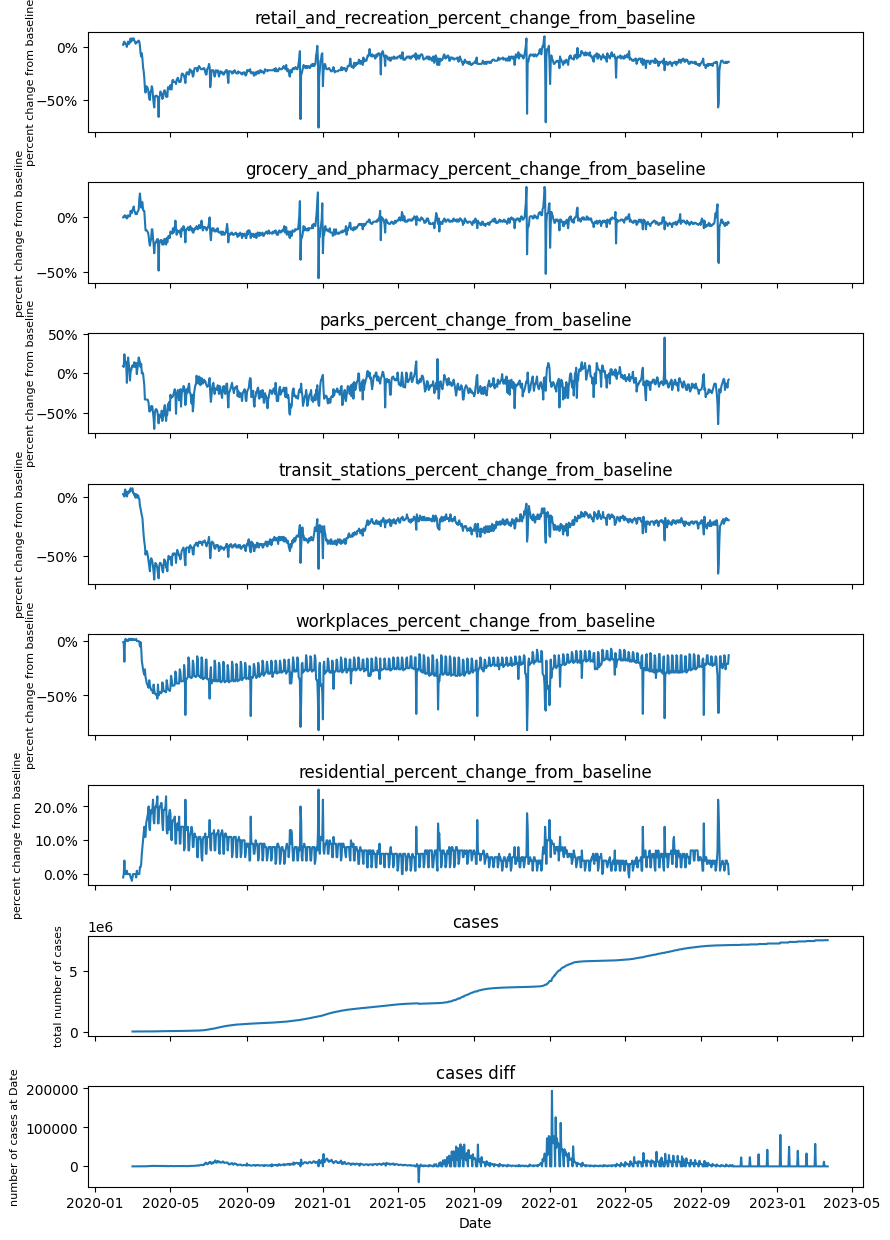

In [22]:
# TODO Q9
df_cases_subset= df_cases_subset.sort_values(by='date')
df_subset = df_subset.sort_values(by='date')
nPerc = 6
nRow = nPerc+2

fig, axes = plt.subplots(nRow, 1, figsize=(10, 15), sharex=True)
fig.subplots_adjust(hspace=0.5)
for i in range(nPerc):
    axes[i].yaxis.set_major_formatter(PercentFormatter())
    axes[i].set_ylabel("percent change from baseline", fontsize=8, labelpad=8*(i%2))

axes[0].set_title('retail_and_recreation_percent_change_from_baseline')
axes[0].plot(df_subset['date'], df_subset['retail_and_recreation_percent_change_from_baseline'])

axes[1].set_title('grocery_and_pharmacy_percent_change_from_baseline')
axes[1].plot(df_subset['date'], df_subset['grocery_and_pharmacy_percent_change_from_baseline'])

axes[2].set_title('parks_percent_change_from_baseline')
axes[2].plot(df_subset['date'], df_subset['parks_percent_change_from_baseline'])

axes[3].set_title('transit_stations_percent_change_from_baseline')
axes[3].plot(df_subset['date'], df_subset['transit_stations_percent_change_from_baseline'])

axes[4].set_title('workplaces_percent_change_from_baseline')
axes[4].plot(df_subset['date'], df_subset['workplaces_percent_change_from_baseline'])

axes[5].set_title('residential_percent_change_from_baseline')
axes[5].plot(df_subset['date'], df_subset['residential_percent_change_from_baseline'])

axes[6].set_title('cases')
axes[6].set_ylabel("total number of cases", fontsize=8)
axes[6].plot(df_cases_subset['date'], df_cases_subset['cases'])

cases_diff = np.diff(df_cases_subset['cases'], prepend=df_cases_subset.iloc[0]['cases'])
axes[7].set_title('cases diff')
axes[7].set_ylabel("number of cases at Date", fontsize=8)
axes[7].plot(df_cases_subset['date'], cases_diff)

plt.xlabel("Date")
plt.show()

**TODO** Q10: Answer the following questions:

-   Do the results seem to satisfy “common sense”?
-   Make sure to explain any trends, patterns, or notable anomalies
    observed in your mobility data.
-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to COVID-19 cases, non-pharmaceutical
    interventions such as stay-at-home orders, or vaccinations?
-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to other factors?
-   Cite specific evidence from your plot to support your answer.

The results seem to follow common sense. All graphs seem to follow the Expectations in a epedemic. The virus seems to hit florida around march 2020 where the huge changes in the graphs may indicate the first lockdown or resrictions. People are avoiding contacting other people and shift to stay at home if possible. Big spikes are visible in multiple graphs with simular shapes. Thwo massive spikes occur in the christmas holidays in 2020 and 2021 with a correspndent increase in cases. Over time it seems the graphs trend to return to their baslines. The workplace and residential baselines follow the 5 day a week working schedule which can be seen in their consistent spikes over the hole graphs.

The spiky nature of the cases diff graph may indicate that a lot oft people are testet or reportet at specific days (2021-07 - xxxx-xx). In 2021-06 the total number are decresed which does not make sense and probably a correction of the total number of cases. The amount of cases does not seem to highly impact the other statistics (2021-07 - 2021-09). Where it has impactet (2021-12 - 2022-01) can be argued to be caused by the winter holiday.

Based on the fact that florida only had hard restrictions from march 2020 to june 2020, most data does not show the effects of lockdowns.


**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why their mobility data
might *not* be useful for understanding the effect of COVID-19-related
interventions, or why the data might be misleading.

-   For the U.S. state you have chosen, briefly answer *all* of the
    questions in that checklist, and explain how your answer affects the
    validity of the data.

-   Based on your answers, do you think there are any serious problems
    associated with using this data for understanding user mobility
    changes due to COVID-19?